<a href="https://colab.research.google.com/github/yckamra/Colorectal-Cancer-Detection-ResNet18/blob/main/notebooks/animals10_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
print("Installing project dependencies...")
!pip install numpy pandas scipy scikit-learn # Basic libraries we want
!pip install torch
print("Dependencies installed successfully.")

Installing project dependencies...
Dependencies installed successfully.


In [47]:
from google.colab import auth
from torchvision import transforms
from PIL import Image
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

Dataset can be found [here](https://www.kaggle.com/datasets/alessiocorrado99/animals10). It is the animal10 dataset.

In [25]:
auth.authenticate_user()

!gcloud config set project mlops-animal-classifier

Updated property [core/project].


Below is the dictionary to map the Italian word to the English translation. Given by the Kaggle dataset.

In [26]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

In [27]:
dog_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/cane/
horse_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/cavallo/
elephant_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/elefante/
butterfly_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/farfalla/
chicken_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/gallina/
cat_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/gatto/
cow_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/mucca/
sheep_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/pecora/
squirrel_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/scoiattolo/
spider_paths = !gsutil ls -r gs://mlops-animal-classifier/raw_data/ragno/

In [37]:
dog_paths = list(dog_paths[1:])
horse_paths = list(horse_paths[1:])
elephant_paths = list(elephant_paths[1:])
butterfly_paths = list(butterfly_paths[1:])
chicken_paths = list(chicken_paths[1:])
cat_paths = list(cat_paths[1:])
cow_paths = list(cow_paths[1:])
sheep_paths = list(sheep_paths[1:])
squirrel_paths = list(squirrel_paths[1:])
spider_paths = list(spider_paths[1:])

In [38]:
print(f"Number of DOG images: {len(dog_paths)}")
print(f"Number of HORSE images: {len(horse_paths)}")
print(f"Number of ELEPHANT images: {len(elephant_paths)}")
print(f"Number of BUTTERFLY images: {len(butterfly_paths)}")
print(f"Number of CHICKEN images: {len(chicken_paths)}")
print(f"Number of CAT images: {len(cat_paths)}")
print(f"Number of COW images: {len(cow_paths)}")
print(f"Number of SHEEP images: {len(sheep_paths)}")
print(f"Number of SQUIRREL images: {len(squirrel_paths)}")
print(f"Number of SPIDER images: {len(spider_paths)}")

Number of DOG images: 4863
Number of HORSE images: 2623
Number of ELEPHANT images: 1446
Number of BUTTERFLY images: 2112
Number of CHICKEN images: 3098
Number of CAT images: 1668
Number of COW images: 1866
Number of SHEEP images: 1820
Number of SQUIRREL images: 1862
Number of SPIDER images: 4821


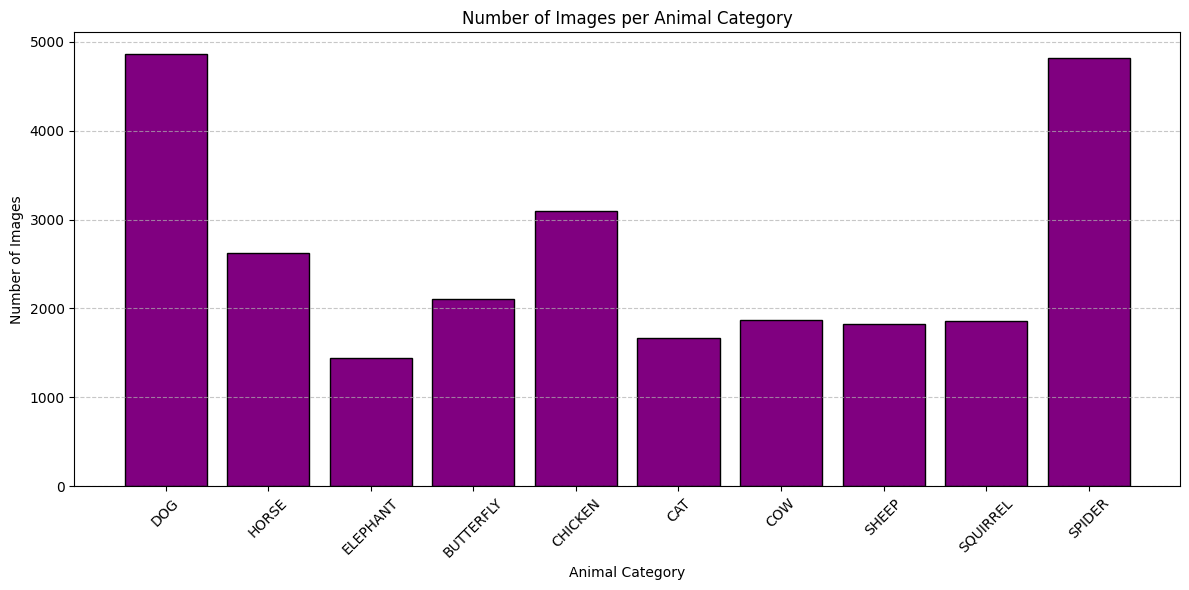

In [39]:
num_images = {
    "DOG": len(dog_paths),
    "HORSE": len(horse_paths),
    "ELEPHANT": len(elephant_paths),
    "BUTTERFLY": len(butterfly_paths),
    "CHICKEN": len(chicken_paths),
    "CAT": len(cat_paths),
    "COW": len(cow_paths),
    "SHEEP": len(sheep_paths),
    "SQUIRREL": len(squirrel_paths),
    "SPIDER": len(spider_paths)
}

# Extract data for plotting
labels = list(num_images.keys())
counts = list(num_images.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='purple', edgecolor='black')

# Adding labels and title
plt.xlabel('Animal Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Animal Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

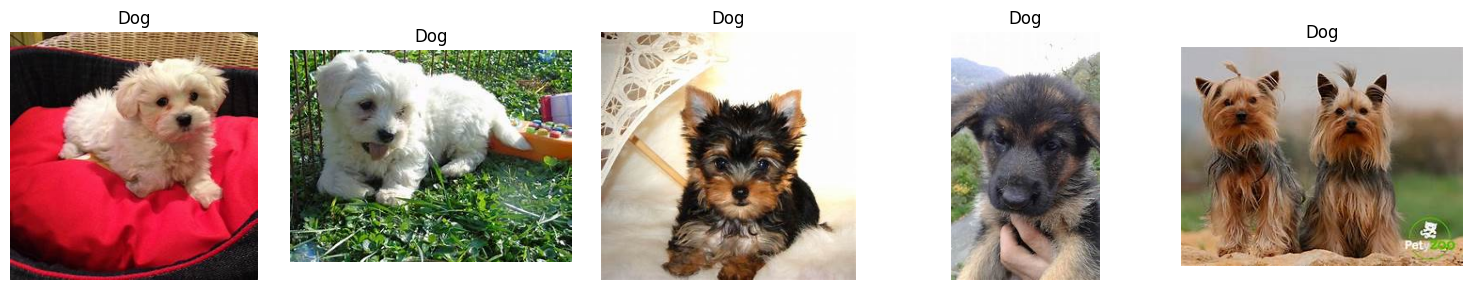

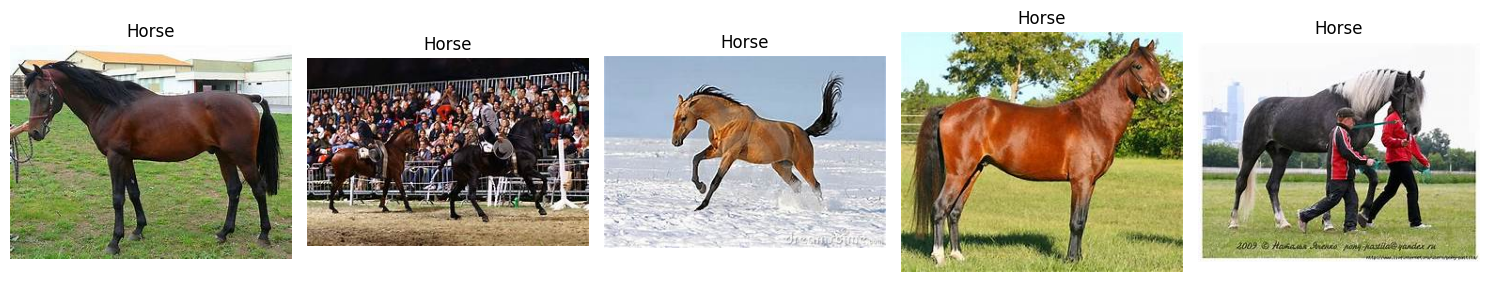

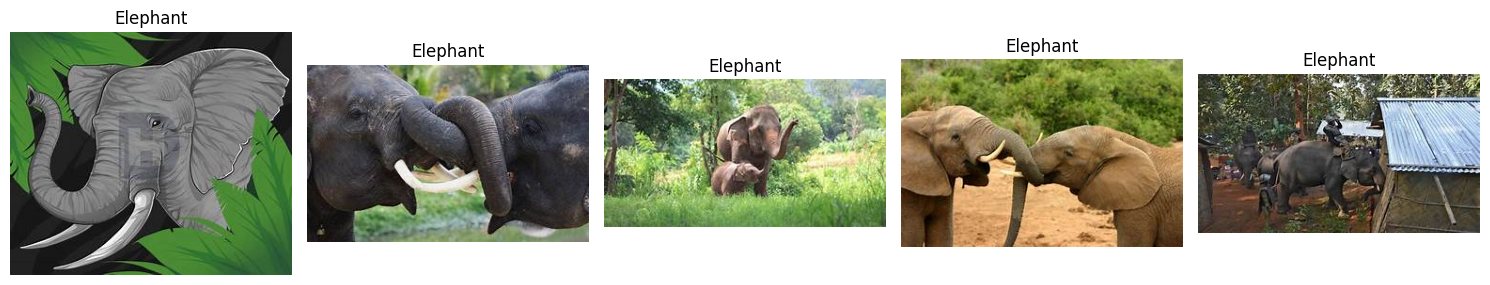

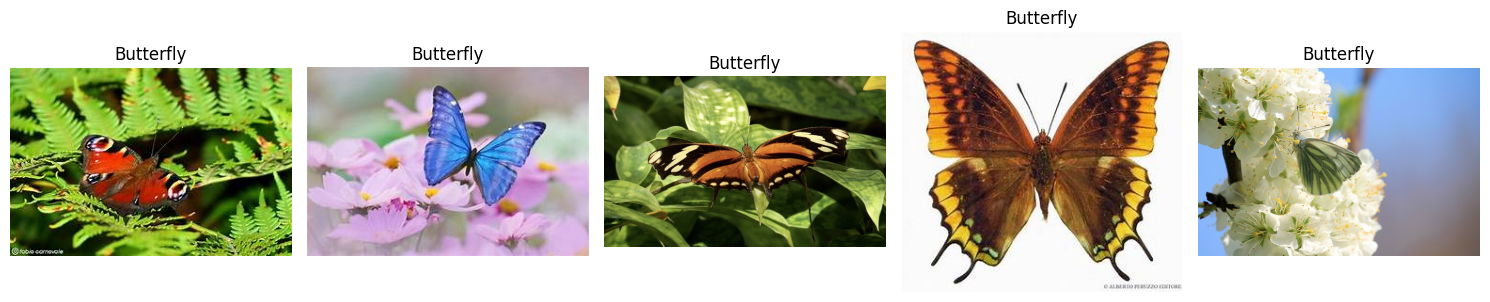

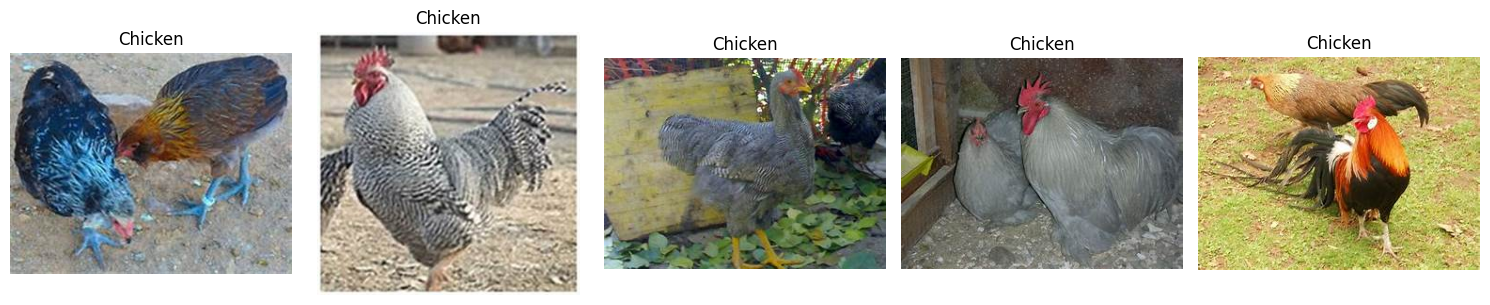

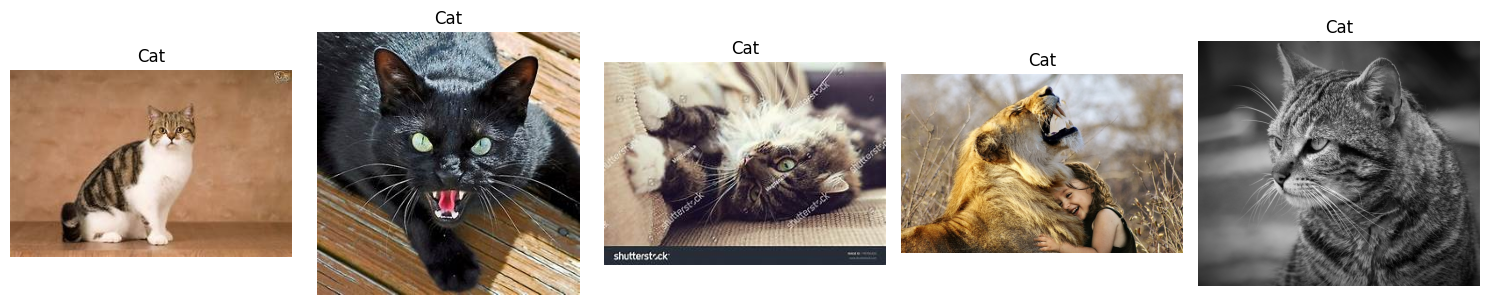

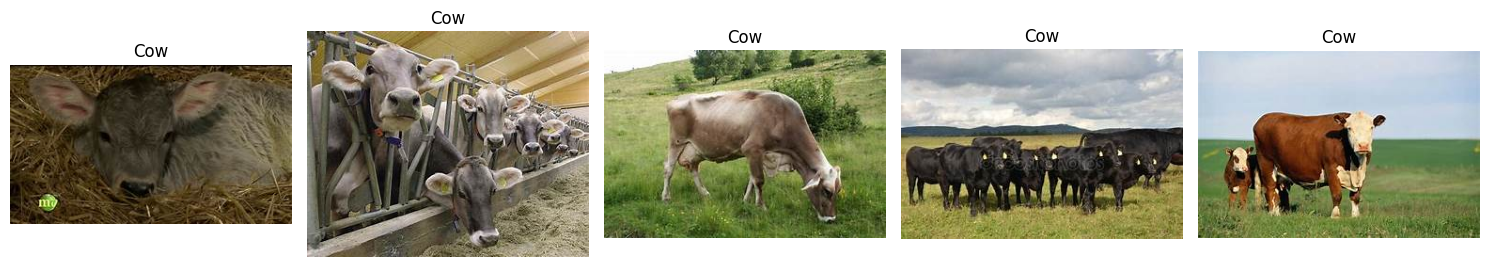

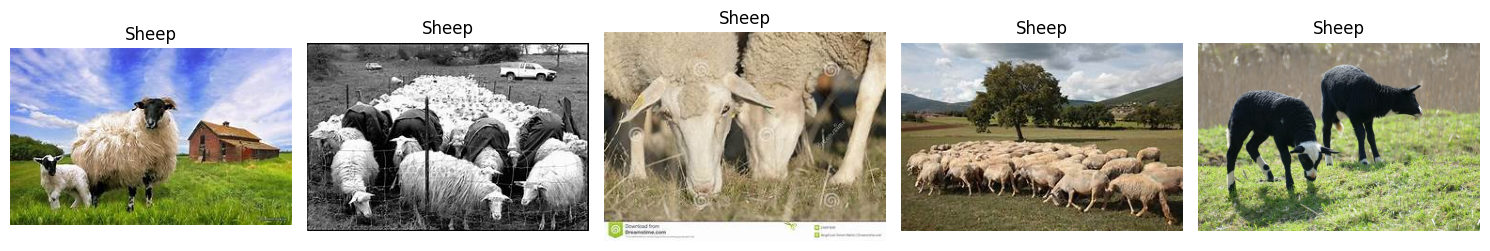

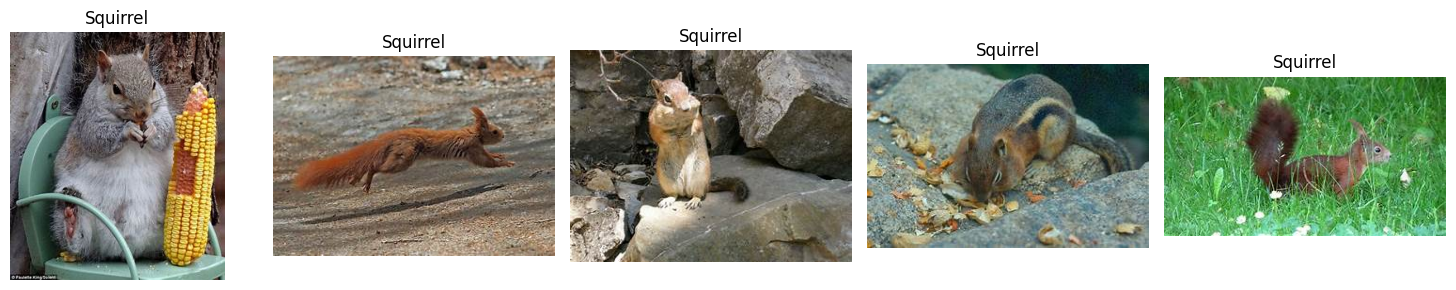

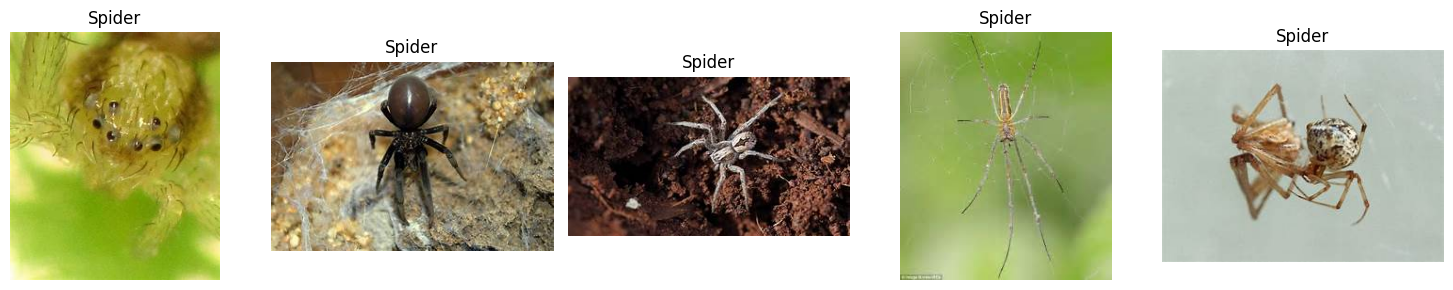

In [49]:
def show_random_images(image_paths, class_name, n=5):
    sample_paths = random.sample(image_paths, min(n, len(image_paths)))

    plt.figure(figsize=(15, 3))
    for i, path in enumerate(sample_paths):
        with tf.io.gfile.GFile(path, 'rb') as f:
            img = Image.open(f)
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_name}")
    plt.tight_layout()
    plt.show()

show_random_images(dog_paths, "Dog")
show_random_images(horse_paths, "Horse")
show_random_images(elephant_paths, "Elephant")
show_random_images(butterfly_paths, "Butterfly")
show_random_images(chicken_paths, "Chicken")
show_random_images(cat_paths, "Cat")
show_random_images(cow_paths, "Cow")
show_random_images(sheep_paths, "Sheep")
show_random_images(squirrel_paths, "Squirrel")
show_random_images(spider_paths, "Spider")

In [51]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Let's take a look at how our transform will work on our images.

In [53]:
# Load image from GCS (using tf.io.gfile)
path = dog_paths[0]
with tf.io.gfile.GFile(path, 'rb') as f:
    img = Image.open(f).convert('RGB')  # Ensure 3 channels

# Apply transform
img_t = transform(img)  # This is a tensor ready for model input

print(img_t.shape)  # Should be [3, 224, 224]
print(dog_paths[0])

torch.Size([3, 224, 224])
gs://mlops-animal-classifier/raw_data/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
